In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
import pandas as pd

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import MACCSkeys

import matplotlib.pyplot as plt
import seaborn as sns 


seed=42

compare sets of PI3K inhibitors and random compounds from zinc15

# load data
* i am using papyrus as it has better curated and standardized entries(no need for desalting)
* i chose pi3k as it has many entries in papyrus

In [327]:
df = pd.read_csv('papyrus.tsv', delimiter="\t")

# print target_id for which there is most rows
print(df['target_id'].value_counts()[:20])


# select pi3k 
pi3k = df[df['target_id'].str.contains('P42336')]

# save to file
pi3k.to_csv('pi3k.tsv', sep='\t', index=False)

target_id
Q03431_WT    41598
Q9NUW8_WT    26971
Q16637_WT    23844
Q194T2_WT    23813
P51450_WT    20236
P00352_WT    20052
P02791_WT    15037
Q962Y6_WT    13813
Q9F4F7_WT    12098
P51151_WT    11729
P42336_WT    11319
P00533_WT     9900
O15118_WT     9616
Q16539_WT     9269
P08684_WT     8806
P97697_WT     8664
Q03164_WT     8494
P24941_WT     8367
P04637_WT     8179
P48736_WT     8122
Name: count, dtype: int64


In [328]:
pi3k.describe()

,Year,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
count,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000
mean,2010.431739,6.774832,0.054493,0.019258,5.517982,6.776688,0.025216
std,2.698216,1.110083,0.180075,0.069834,4.784362,1.117080,0.112308
min,1999.000000,3.125000,0.000000,0.000000,2.000000,3.125000,0.000000
25%,2009.000000,5.964050,0.000000,0.000000,4.000000,5.960000,0.000000
50%,2010.000000,6.732450,0.000000,0.000000,4.000000,6.730000,0.000000
75%,2012.000000,7.553000,0.000535,0.000189,8.000000,7.550000,0.000000
max,2019.000000,10.523000,1.764960,0.882480,210.000000,10.560500,1.577500


In [5]:
# load random for-sale compoudns from zinc15
for_sale = pd.read_csv('for-sale.csv')
display(for_sale.shape)

# randomly sample as many samples as i have in the pi3k, because the original 96200 is too much for consequent analyses
for_sale = for_sale.sample(pi3k.shape[0], random_state=seed)
for_sale = for_sale.rename(columns={'smiles':'SMILES'})
display(for_sale.head())
display(for_sale.shape)

(96200, 2)

,zinc_id,SMILES
9789,ZINC000000034603,Cc1nc2ccccc2nc(C)c1=NOCc1cccc(F)c1
5985,ZINC000000029089,CC1(CC(=O)N/N=C/c2cc(Br)ccc2O)OCCO1
69232,ZINC000000135344,N#C/C(=C\c1ccc([N+](=O)[O-])cc1)C(N)=S
65594,ZINC000000129519,Cc1cccc(C)c1OC(=O)COc1ccc(Cl)cc1
4670,ZINC000000022720,O=C(NCc1ccccc1C(F)(F)F)c1ccc2cnccc2n1


(11456, 2)

In [222]:
pi3k['set'] = 'pi3k'
for_sale['set'] = 'for_sale'


data = pd.concat([for_sale, pi3k], ignore_index=True)

data['mols'] = [Chem.MolFromSmiles(smi) for smi in data['SMILES']]

/var/folders/_2/_5l3gbgs7yz9zvd526ygjz6w0000gn/T/ipykernel_77537/111459879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi3k['set'] = 'pi3k'


# Compare descriptors

## descriptors

In [31]:
# add descriptors function 
def add_descriptors(df):

    # find smiles column iregardless of case
    smiles = [col for col in df.columns if 'smiles' in col.lower()][0]




    df['mols'] = [Chem.MolFromSmiles(smi) for smi in df[smiles]]

    # add descriptors 
    df['molwt'] = [rdescriptors.CalcExactMolWt(mol) for mol in df['mols']]
    df['logp'] = [rdescriptors.CalcCrippenDescriptors(mol)[0] for mol in df['mols']]
    df['hba'] = [rdescriptors.CalcNumLipinskiHBA(mol) for mol in df['mols']]
    df['hbd'] = [rdescriptors.CalcNumLipinskiHBD(mol) for mol in df['mols']]
    df['tpsa'] = [rdescriptors.CalcTPSA(mol) for mol in df['mols']]
    df['rotatable'] = [rdescriptors.CalcNumRotatableBonds(mol) for mol in df['mols']]
    df['atoms'] = [rdescriptors.CalcNumHeavyAtoms(mol) for mol in df['mols']]
    df['rings'] = [rdescriptors.CalcNumRings(mol) for mol in df['mols']]

    # drop mols column
    #df = df.drop(columns=['mols'])

    return df

In [ ]:
pi3k = pi3k[]

In [32]:
for_sale = add_descriptors(for_sale)
pi3k = add_descriptors(pi3k)

/var/folders/_2/_5l3gbgs7yz9zvd526ygjz6w0000gn/T/ipykernel_75936/5479261.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mols'] = [Chem.MolFromSmiles(smi) for smi in df[smiles]]
/var/folders/_2/_5l3gbgs7yz9zvd526ygjz6w0000gn/T/ipykernel_75936/5479261.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['molwt'] = [rdescriptors.CalcExactMolWt(mol) for mol in df['mols']]
/var/folders/_2/_5l3gbgs7yz9zvd526ygjz6w0000gn/T/ipykernel_75936/5479261.py:14: SettingWithCopyWarning: 
A value is trying to be

<Axes: xlabel='variable', ylabel='value'>

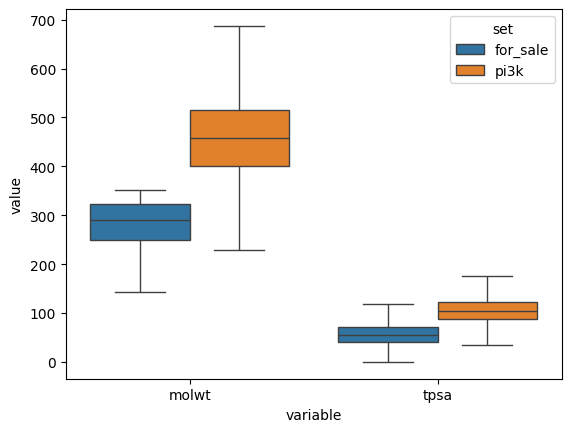

In [40]:
pi3k['set'] = 'pi3k'
for_sale['set'] = 'for_sale'

# merge data
data = pd.concat([for_sale, pi3k], ignore_index=True)

# melt 
data = pd.melt(data, id_vars=['set'], value_vars=['molwt','tpsa'], var_name='variable', value_name='value')

sns.boxplot(y='value', x='variable', hue='set', data=data, showfliers=False)

<Axes: xlabel='variable', ylabel='value'>

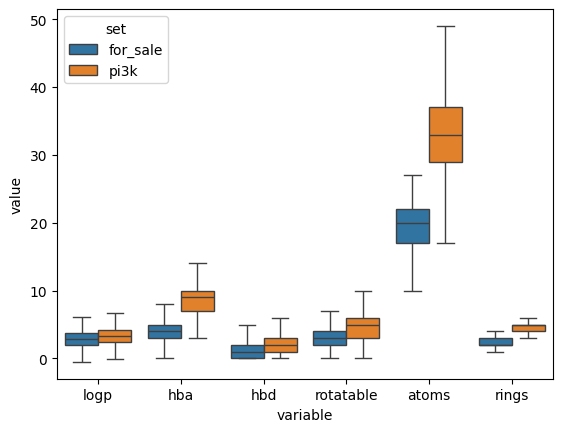

In [43]:
# merge data
data = pd.concat([for_sale, pi3k], ignore_index=True)

# melt
data = pd.melt(data, id_vars=['set'], value_vars=['logp', 'hba', 'hbd', 'rotatable', 'atoms', 'rings'], var_name='variable', value_name='value')

sns.boxplot(y='value', x='variable', hue='set', data=data, showfliers=False)

* the molecules from the pi3k dataset have higher molecular weights, as well as surface area
* The number of atoms on in the pi3k set is much higher and they also have more hydrogen acceptors, which might reveal something interesting about how it docks

In [108]:
# merge data
data = pd.concat([for_sale, pi3k], ignore_index=True)

data['mols'] = [Chem.MolFromSmiles(smi) for smi in data['SMILES']]

data = data.join(pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in data["mols"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

<Axes: xlabel='variable', ylabel='value'>

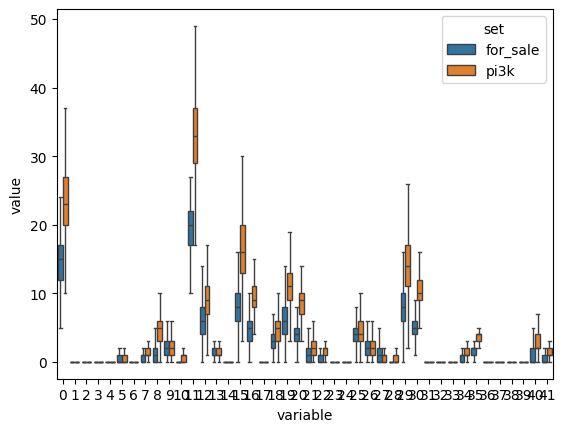

In [78]:
# melt
data = pd.melt(data, id_vars=['set'], value_vars=[i for i in range(42)], var_name='variable', value_name='value')

sns.boxplot(y='value', x='variable', hue='set', data=data, showfliers=False)


In [ ]:
df = df.join(pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in df["rdmol"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

## maccs

In [191]:
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
data = pd.concat([for_sale, pi3k], ignore_index=True)


data['mols'] = [Chem.MolFromSmiles(smi) for smi in data['SMILES']]
data['maccs'] = [MACCSkeys.GenMACCSKeys(mol) for mol in data['mols']]


In [367]:
# borrowed from exercises 
def similarity_search(query_fp, searched_fp_set, cutoff=0.8):
    # we have no index, so we will have to just iterate through the entire searched set
    hits = []
    for i,fp in searched_fp_set.iterrows():
        similarity = DataStructs.TanimotoSimilarity(query_fp, fp['ecfp'])
        if similarity >= cutoff: # similar enough for consideration
            hits.append((i, similarity))
    return sorted(hits, key=lambda x: x[1], reverse=True) # stronger hits first

In [380]:
import numpy as np                                                                                                                
                                                                                                                                   
def similarity_search(query_fp, searched_fp_set, cutoff=0.8):                                                                     
     similarities = np.vectorize(lambda x: DataStructs.TanimotoSimilarity(query_fp, x))(searched_fp_set['ecfp'])                   
     hits = [(searched_fp_set.index[i], similarity) for i, similarity in enumerate(similarities) if similarity >= cutoff]                                
     return sorted(hits, key=lambda x: x[1], reverse=True)   

* molecules in the random dataset similiar to pi3k ligands

In [197]:
from rdkit.Chem import AllChem as Chem

In [335]:
data['ecfp'] = [Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1042) for mol in data['mols']]

In [381]:
from tqdm import tqdm
pi3k_ligand_queries = []

pi3k = data[data['set']=='pi3k']
for_sale = data[data['set']=='for_sale']


for row_index, row in tqdm(pi3k.iterrows()):
    pi3k_ligand_queries.append((row_index,similarity_search(row['ecfp'],for_sale)))



0it [00:00, ?it/s]

4it [00:00, 37.26it/s]

9it [00:00, 42.70it/s]

14it [00:00, 44.45it/s]

19it [00:00, 45.14it/s]

24it [00:00, 45.22it/s]

29it [00:00, 45.66it/s]

34it [00:00, 46.09it/s]

39it [00:00, 46.23it/s]

44it [00:00, 46.36it/s]

49it [00:01, 46.23it/s]

54it [00:01, 46.20it/s]

59it [00:01, 46.27it/s]

64it [00:01, 46.40it/s]

69it [00:01, 46.34it/s]

74it [00:01, 45.98it/s]

79it [00:01, 45.62it/s]

84it [00:01, 45.54it/s]

89it [00:01, 45.63it/s]

94it [00:02, 45.54it/s]

99it [00:02, 45.62it/s]

104it [00:02, 45.65it/s]

109it [00:02, 45.55it/s]

114it [00:02, 45.16it/s]

119it [00:02, 44.88it/s]

124it [00:02, 45.01it/s]

129it [00:02, 38.92it/s]

134it [00:03, 40.70it/s]

139it [00:03, 42.17it/s]

144it [00:03, 43.32it/s]

149it [00:03, 44.04it/s]

154it [00:03, 44.50it/s]

159it [00:03, 44.92it/s]

164it [00:03, 45.02it/s]

169it [00:03, 45.18it/s]

174it [00:03, 45.37it/s]

179it [00:03, 45.46it/s]

184it [00:04, 45.58it/s]

189it [00:04, 45.52it/s]

194it [00:04

In [382]:
pi3k_ligand_hits = [i for i in pi3k_ligand_queries if i[1]]

In [383]:
pi3k_ligand_hits

[(16264, [(2268, 1.0)]), (17567, [(10870, 1.0)])]

In [394]:
for i in pi3k_ligand_hits:
    print(i)

indexes = pi3k_ligand_hits

(16264, [(2268, 1.0)])
(17567, [(10870, 1.0)])


16264


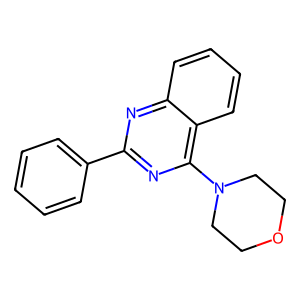

2268


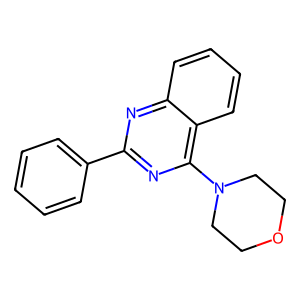

17567


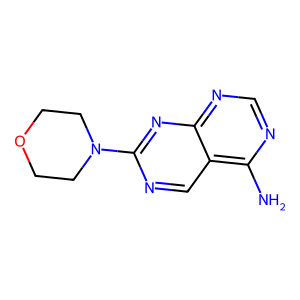

10870


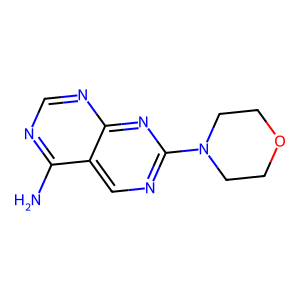

In [419]:
for i in pi3k_ligand_hits:
    print(i[0])

    # pi3k 
    mol = data.loc[i[0],'mols']
    img = Draw.MolToImage(mol)
    display(img)

    print(i[1][0][0])
    img = Draw.MolToImage(data.loc[i[1][0][0],'mols'])
    display(img)

* similiarity is 1.0 and therefore the molecules match perfectly - nothing beyond the molecules already present in the for_sale set was found

### most common substructures

## pains

* pains match percentage 

## scaffolds
reduce both sets to scaffolds and vizualise the most prevalent ones in both sets

In [133]:
from rdkit.Chem.Scaffolds import MurckoScaffold
# function borrowed from excercises 
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff

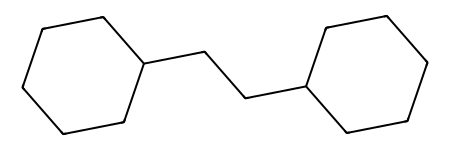

In [147]:
scaffold(data['mols'][7])

In [141]:
data['scaffold'] = [scaffold(mol) for mol in data['mols']]

In [150]:
data['scaffold_smiles'] = [Chem.MolToSmiles(mol) for mol in data['scaffold']]

In [151]:
data['scaffold_smiles'].value_counts()

scaffold_smiles
C1CCCCC1                                                         1195
C1CCC(CCC2CCCCC2)CC1                                              754
C1CCC(CCCCC2CCCCC2)CC1                                            585
C1CCC(C2CCCC2)CC1                                                 550
C1CCC2CCCC2C1                                                     380
                                                                 ... 
C1CCC(CCCC2CCC(CCC3CCC4C(C5CCCCC5)CC(C5CCCCC5)CC34)CC2)CC1          1
C1CC2CCC3CCC4CCCC(C2C1)C43                                          1
C1CCC2(CC1)CCC1CCCCC1C2                                             1
C1CCC2CC(CC3CCC4CCCC(C5CCC(CCC6CC6)CC5)C43)CC2C1                    1
C1CCCCCCCCC2CC(CCCCCCC1)CCC2CCCCCCCCCC1CCC2CCC(C3CCCCC3)CC2C1       1
Name: count, Length: 2555, dtype: int64

In [183]:
# print out most prevalent scaffolds per set 
print(data.groupby('set')['scaffold_smiles'].value_counts().groupby('set').head(10))

set       scaffold_smiles                                       
for_sale  C1CCCCC1                                                  1186
          C1CCC(CCC2CCCCC2)CC1                                       744
          C1CCC(CCCCC2CCCCC2)CC1                                     585
          C1CCC(C2CCCC2)CC1                                          531
          C1CCC2CCCC2C1                                              376
          C1CCC(CC2CCCCC2)CC1                                        352
          C1CCC(C2CCCCC2)CC1                                         334
          C1CCC(CCC2CCCC2)CC1                                        319
          C1CCC(CCCC2CCCCC2)CC1                                      309
          C1CCC2CCCCC2C1                                             249
pi3k      C1CCC(C2CCC3CCC4CCC(C5CCCC5)C4C3C2)CC1                     351
          C1CCC(CC2CCC(C3CCC4C(C5CCCCC5)CC(C5CCCCC5)CC34)CC2)CC1     293
          C1CCC(C2CC(C3CCCCC3)C3CCC(C4CCCCC4)C3C2)CC1      

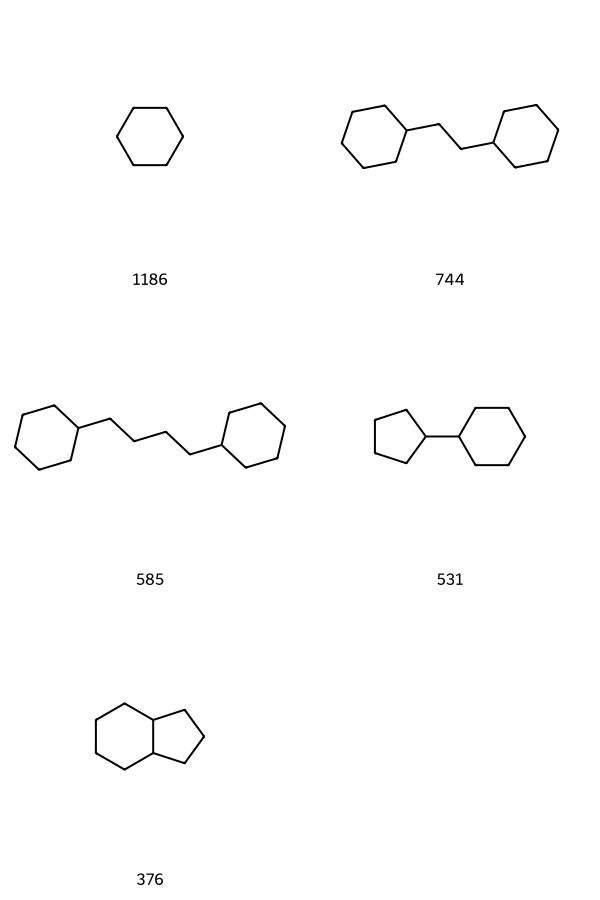

In [185]:
# most prevalent scaffolds in for_sale
counts = data[data['set']=='for_sale']['scaffold_smiles'].value_counts()
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in counts[:5].items()],
                     molsPerRow=2, 
                     subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in counts[:5].items()]
                    )

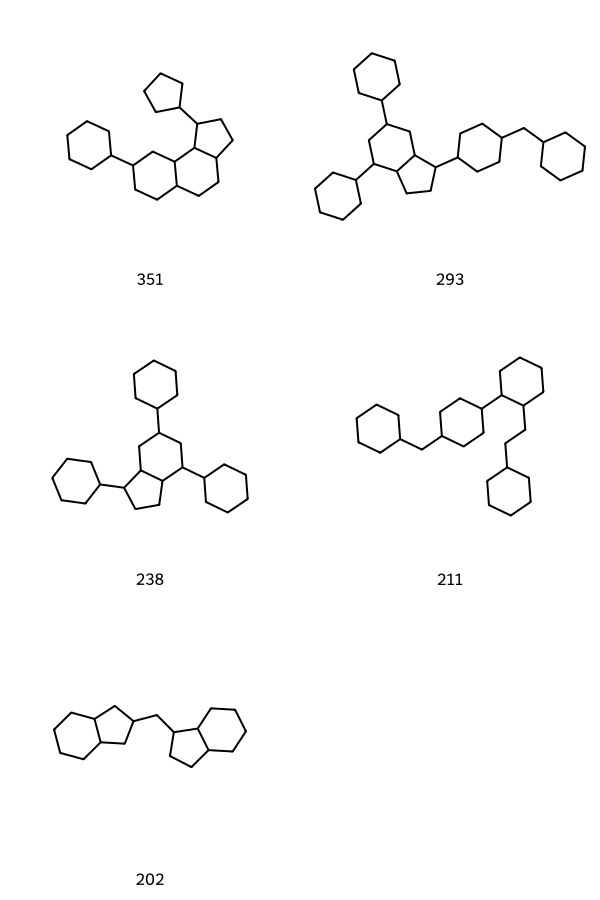

In [182]:
# most prevalent scaffolds in pi3k
counts = data[data['set']=='pi3k']['scaffold_smiles'].value_counts()
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in counts[:5].items()],
                     molsPerRow=2, 
                     subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in counts[:5].items()]
                    )

* the compounds inhibiting pi3k activity seem to be bigger and more diverse in terms of scaffolds

# Visualize

In [420]:
# visualize both datasets using umap, t-SNE and PCA based on MQN and MACCS

## pca 

In [ ]:
# add MQNs
data = data.join(pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in data["mols"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

In [430]:
data.columns

Index(['zinc_id', 'SMILES', 'molwt', 'logp', 'hba', 'hbd', 'tpsa', 'rotatable',
       'atoms', 'rings', 'set', 'Activity_ID', 'Quality', 'source', 'CID',
       'connectivity', 'InChIKey', 'InChI', 'InChI_AuxInfo', 'target_id',
       'accession', 'Protein_Type', 'AID', 'doc_id', 'Year', 'all_doc_ids',
       'all_years', 'type_IC50', 'type_EC50', 'type_KD', 'type_Ki', 'relation',
       'pchembl_value', 'pchembl_value_Mean', 'pchembl_value_StdDev',
       'pchembl_value_SEM', 'pchembl_value_N', 'pchembl_value_Median',
       'pchembl_value_MAD', 'mols', 'maccs', 'ecfp', 'MQN_1', 'MQN_2', 'MQN_3',
       'MQN_4', 'MQN_5', 'MQN_6', 'MQN_7', 'MQN_8', 'MQN_9', 'MQN_10',
       'MQN_11', 'MQN_12', 'MQN_13', 'MQN_14', 'MQN_15', 'MQN_16', 'MQN_17',
       'MQN_18', 'MQN_19', 'MQN_20', 'MQN_21', 'MQN_22', 'MQN_23', 'MQN_24',
       'MQN_25', 'MQN_26', 'MQN_27', 'MQN_28', 'MQN_29', 'MQN_30', 'MQN_31',
       'MQN_32', 'MQN_33', 'MQN_34', 'MQN_35', 'MQN_36', 'MQN_37', 'MQN_38',
       'MQN_39'

In [434]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=42)
pca.fit(data[(f"MQN_{x}" for x in range(1, 43))])
data = data.join(pd.DataFrame(pca.transform(data[(f"MQN_{x}" for x in range(1, 43))]),
                          columns=[f"PCA_{x}" for x in range(1, 43)])
            )

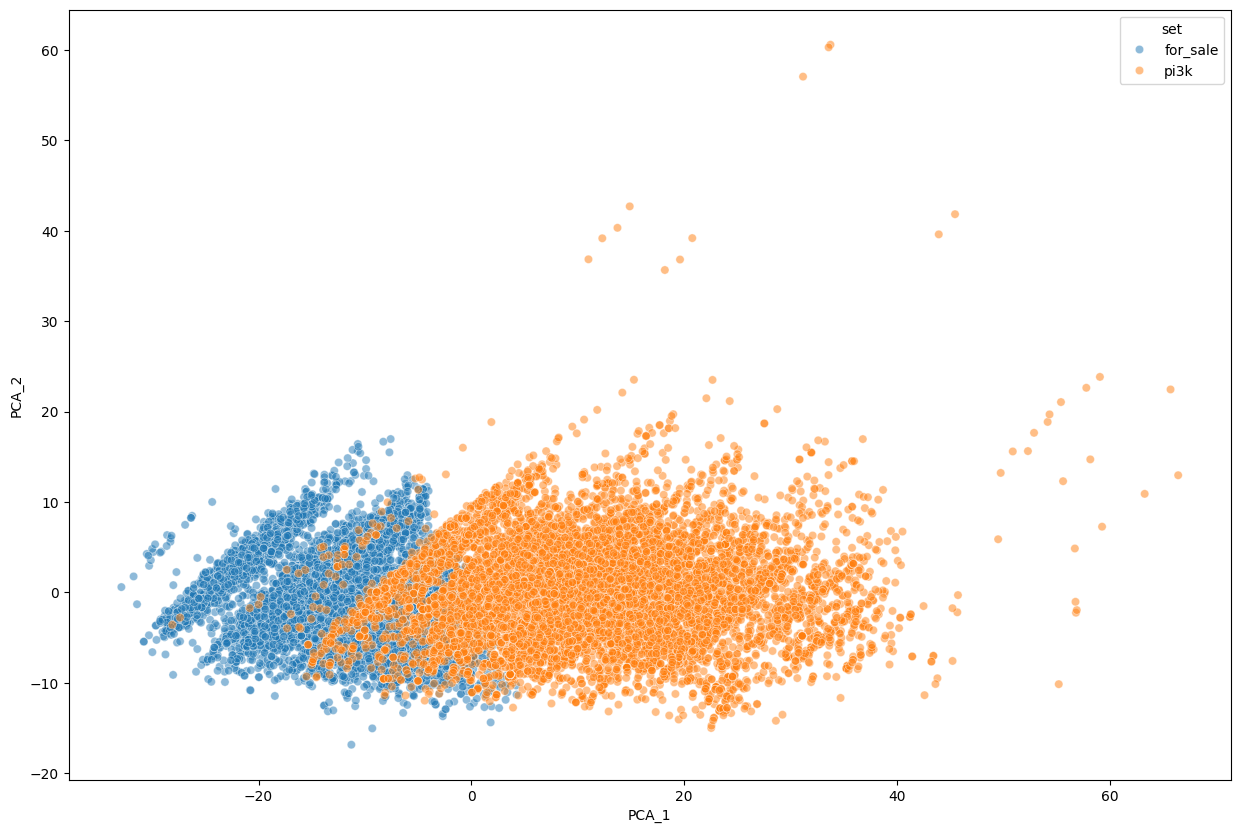

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = pyplot.subplots(figsize=(15,10))
p=sns.scatterplot(x="PCA_1",
                      y="PCA_2",
                      data=data,
                      hue="set",
                      legend="brief",
                      ax=ax,
                      alpha=0.5
                     )

## MDS

In [7]:
# i reduced the vector length because it would take too long to compute the distance matrix 
data["fps"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=512) for m in data['mols']]

In [8]:
# stratified sample 2000 from each set to be able to practically compute the distance matrix 

# Define the stratifying column                                                                                                   
strata_column = 'set'                                                                                                             
                                                                                                                           
# Define the sample size for each stratum                                                                                         
sample_size = 2000                                                                                                                
                                                                                                                           
# Perform stratified sampling                                                                                                     
sampled_data = data.groupby(strata_column).apply(lambda x: x.sample(n=sample_size)).reset_index(drop=True) 

/var/folders/_2/_5l3gbgs7yz9zvd526ygjz6w0000gn/T/ipykernel_77537/3488491892.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby(strata_column).apply(lambda x: x.sample(n=sample_size)).reset_index(drop=True)


In [11]:
from scipy.spatial import distance

sparse_mat = distance.pdist(list(sampled_data["fps"]),metric="jaccard")

In [12]:
dist_mat = distance.squareform(sparse_mat)

In [101]:
dist_mat.shape

(22912, 22912)

In [13]:
from sklearn import manifold
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
X_mds = clf.fit_transform(dist_mat)

In [14]:
sampled_data = sampled_data.join(pd.DataFrame(X_mds, columns=["mds_x","mds_y"]))


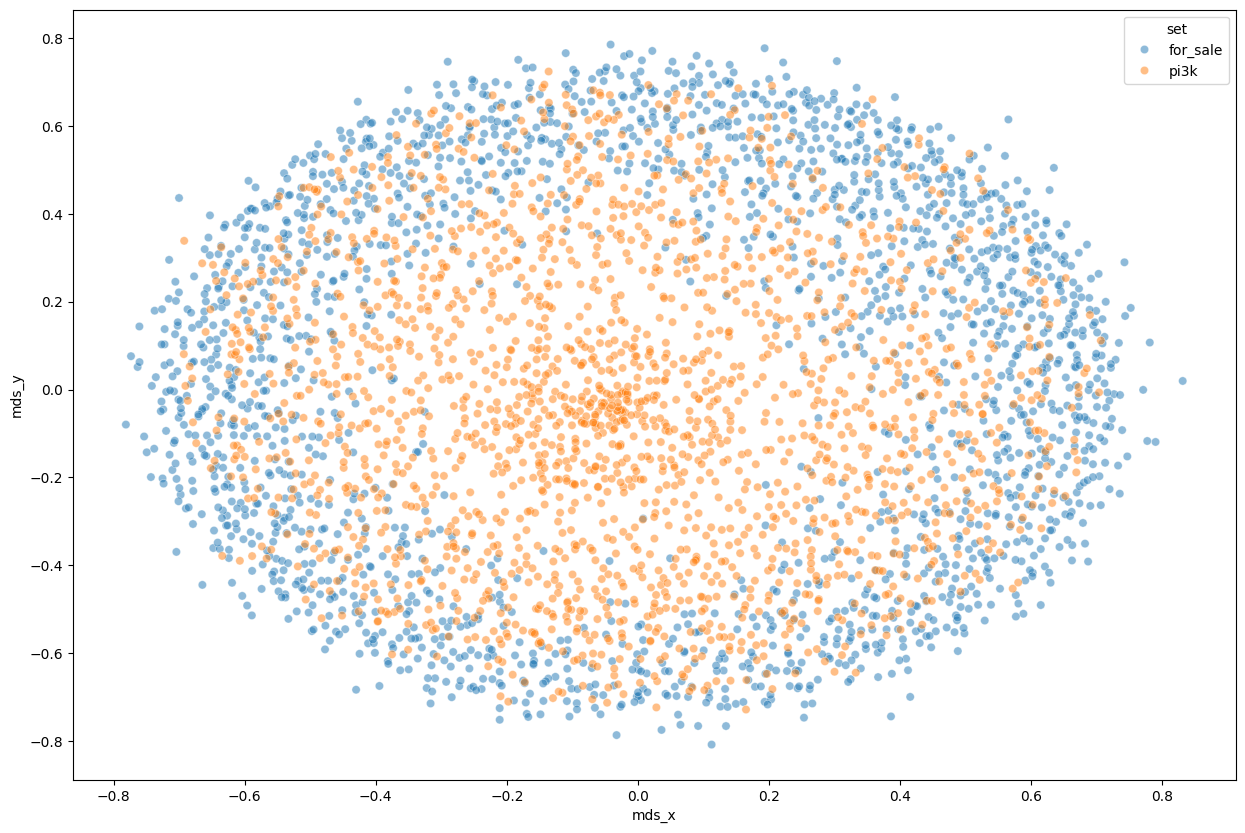

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="mds_x",
                      y="mds_y",
                      data=sampled_data,
                      hue="set",
                      ax=ax,
                      alpha=0.5,
                     )

## t-SNE

In [17]:
clf = manifold.TSNE(n_components=2, metric="precomputed", init="random")
X_tsne = clf.fit_transform(dist_mat)

In [21]:
sampled_data = sampled_data.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"]))

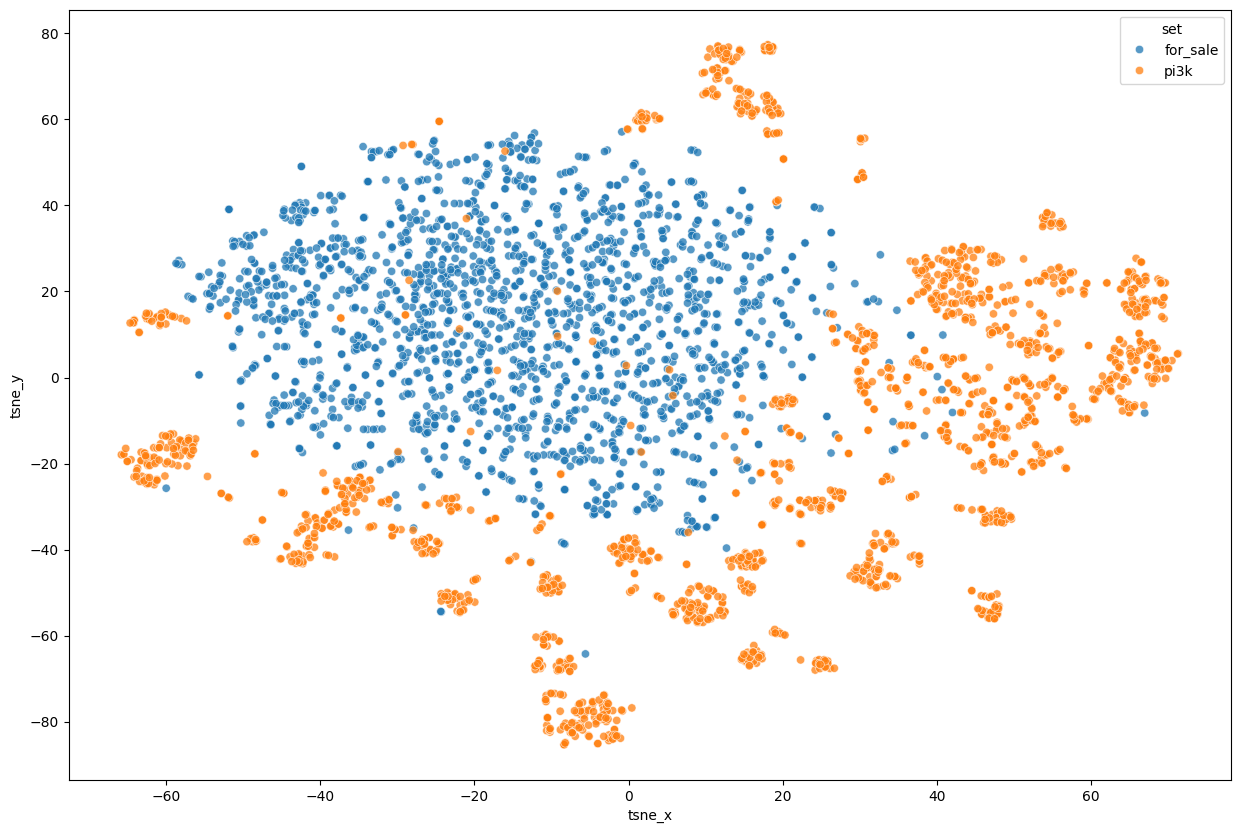

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="tsne_x",
                      y="tsne_y",
                      data=sampled_data,
                      hue="set",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [61]:
import umap
reducer = umap.UMAP(metric="precomputed")
embedding = reducer.fit_transform(dist_mat)

AttributeError: module 'umap' has no attribute 'UMAP'

In [69]:
import numpy as np
np.save('distance_matrix.npy', dist_mat)  

sampled_data.to_csv('sampled_data.csv')

# Classifier

train a classifier to identify new potential pi3k ligands 

- extract features - MACCS, MQNs, ecfp-1042
- split to train test val
- train a random forrest 

In [174]:
data.columns

Index(['zinc_id', 'SMILES', 'set', 'Activity_ID', 'Quality', 'source', 'CID',
       'connectivity', 'InChIKey', 'InChI', 'InChI_AuxInfo', 'target_id',
       'accession', 'Protein_Type', 'AID', 'doc_id', 'Year', 'all_doc_ids',
       'all_years', 'type_IC50', 'type_EC50', 'type_KD', 'type_Ki', 'relation',
       'pchembl_value', 'pchembl_value_Mean', 'pchembl_value_StdDev',
       'pchembl_value_SEM', 'pchembl_value_N', 'pchembl_value_Median',
       'pchembl_value_MAD', 'mols', 'fps', 'tsne_x', 'tsne_y', 'maccs',
       'MQN_1', 'MQN_2', 'MQN_3', 'MQN_4', 'MQN_5', 'MQN_6', 'MQN_7', 'MQN_8',
       'MQN_9', 'MQN_10', 'MQN_11', 'MQN_12', 'MQN_13', 'MQN_14', 'MQN_15',
       'MQN_16', 'MQN_17', 'MQN_18', 'MQN_19', 'MQN_20', 'MQN_21', 'MQN_22',
       'MQN_23', 'MQN_24', 'MQN_25', 'MQN_26', 'MQN_27', 'MQN_28', 'MQN_29',
       'MQN_30', 'MQN_31', 'MQN_32', 'MQN_33', 'MQN_34', 'MQN_35', 'MQN_36',
       'MQN_37', 'MQN_38', 'MQN_39', 'MQN_40', 'MQN_41', 'MQN_42', 'ecfp'],
      dtype='obje

In [224]:
# add label
data['label'] = (data['set']=='pi3k')*1
data['label']

0        0
1        0
2        0
3        0
4        0
        ..
22907    1
22908    1
22909    1
22910    1
22911    1
Name: label, Length: 22912, dtype: int64

In [223]:
data = data[['mols', 'set']]

In [229]:
data = data.drop('set', axis=1)

In [230]:
# add MQNs
data = data.join(pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in data["mols"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

In [233]:
# add MACCS 
mol = data['mols'][0]
data = data.join(pd.DataFrame((list(MACCSkeys.GenMACCSKeys(mol)) for mol in data["mols"]),
                          columns=[*(f"maccs_{x}" for x in range(1,len(list(MACCSkeys.GenMACCSKeys(mol)))+1))])
            )

In [234]:
m = Chem.GetMorganFingerprintAsBitVect(data['mols'][0], 2, nBits=1024)

In [235]:
m = Chem.GetMorganFingerprintAsBitVect(data['mols'][0], 2, nBits=1024)
# add Morgan fingerprints
data = data.join(pd.DataFrame((list(Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)) for mol in data["mols"]),
                          columns=[*(f"ecfp_{x}" for x in range(1,len(m)+1))])
            )

In [238]:
y = data['label']

In [246]:
X = data.iloc[:,2:]
X.shape

(22912, 1233)

In [251]:
# train test val split 
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

In [252]:
X_train.shape

(14663, 1233)

In [272]:
from sklearn.ensemble import RandomForestClassifier    
# Instantiate the Random Forest classifier                                                                                        
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)   
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy of RandomForestClassifier model: 0.9926350245499181
Precision: 0.9950385887541345
Recall: 0.9901261656609983
F1 Score: 0.9925762991476491


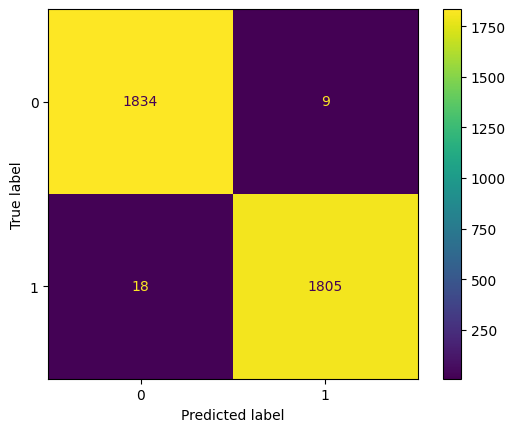

In [307]:
def evaluate(model, X_val, y_val):
    from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
    
    y_pred = model.predict(X_val)
    
    # Calculate precision, recall, and F1 score                                                                                       
    precision = precision_score(y_val, y_pred)                                                                                       
    recall = recall_score(y_val, y_pred)                                                                                             
    f1 = f1_score(y_val, y_pred)   
    accuracy = accuracy_score(y_val, y_pred)                                                                                         
    
    print(f"Accuracy of {str(model.__class__).split('.')[-1][:-2]} model: {accuracy}")                                                                                                                               
    print(f"Precision: {precision}")                                                                                                  
    print(f"Recall: {recall}")                                                                                                        
    print(f"F1 Score: {f1}") 
    
    # Calculate confusion matrix                                                                                                      
    conf_matrix = confusion_matrix(y_val, y_pred)                                                                                                                                                                                            
    ConfusionMatrixDisplay(conf_matrix).plot()

evaluate(rf_classifier,X_val, y_val)
                           

## gaussian classifier

In [308]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

Accuracy of GaussianNB model: 0.9563557010365521
Precision: 0.9586321014892444
Recall: 0.9533735600658255
F1 Score: 0.9559955995599559


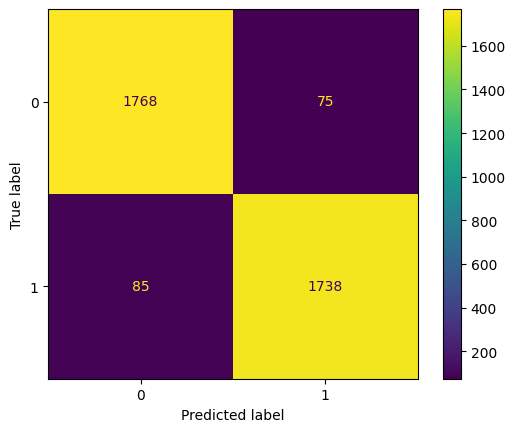

In [309]:
evaluate(model, X_val, y_val)

### test model

Accuracy of RandomForestClassifier model: 0.9934540693868645
Precision: 0.9969094922737307
Recall: 0.9899167032003507
F1 Score: 0.9934007919049714


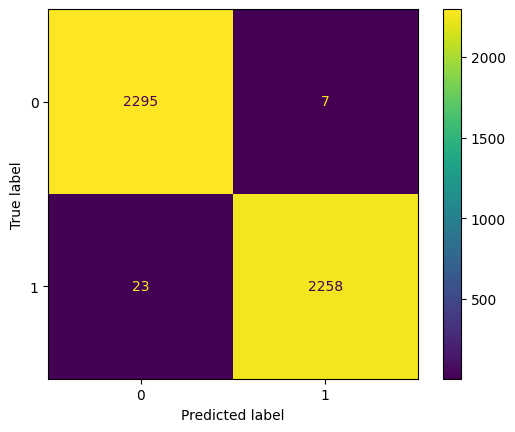

In [310]:
# test best model 
evaluate(rf_classifier, X_test, y_test)

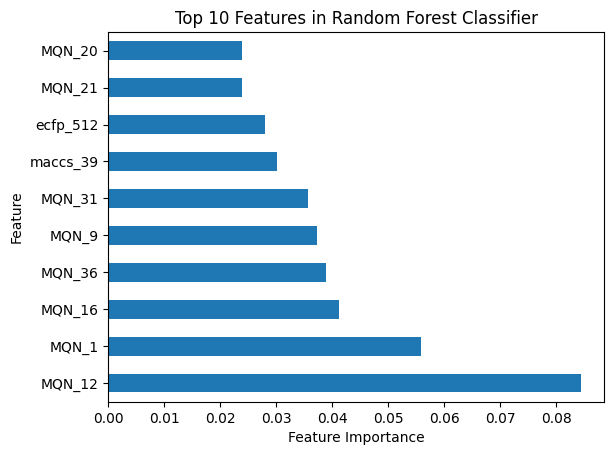

In [318]:
# get feature importances                                                                    
feature_importances = rf_classifier.feature_importances_                                                                          
                                                                                                                               
# get corresponding names                                                
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)                                                
                                                                                                                               
# sort by importance                                                                     
top_features = feature_importances_series.sort_values(ascending=False).head(10)                                                   
top_features.plot(kind='barh')                                                                                                    
plt.xlabel('Feature Importance')                                                                                                  
plt.ylabel('Feature')                                                                                                             
plt.title('Top 10 Features in Random Forest Classifier')                                                                          
plt.show()               

### mqns legend
![mqns](mqns.png)
* https://sci-hub.se/https://doi.org/10.1002/cmdc.200900317